In [237]:
import numpy as np
import math
from tqdm import tqdm

In [132]:
from scipy.stats import expon
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [249]:
alpha_list = [0.01*i for i in range(1,99)]
betta_list = alpha_list


# 1
### Neyman–Pearson criteria

In [320]:
Q = 20
def H1():
    return np.random.exponential(Q)

def H2():
    return np.random.exponential(2*Q)

N = 1000
num_repeat = 100
lst = []
# L1
# alpha = 0.05
# betta = 0.05
N_mean, N_std = [],[]

for alpha in tqdm(alpha_list):
    betta == alpha
    n_temp = []
    for ser in range(num_repeat):
        l1, l2 = [], []
        lst1, lst2 = [], []
        for i in range(N):
            lst1.append(H1())
            l1.append(1/(0.0001+((2**i)*np.exp(-1*sum(lst1)/(2*Q)))))

            lst2.append(H2())
            l2.append((2**i*np.exp(-sum(lst2)/(2*Q))))
            if (np.mean(l1)<alpha and np.mean(l2)<betta) or i == N-1:
                n_temp.append(i)
                break
            
    N_mean.append(np.mean(n_temp))
    N_std.append(np.percentile(n_temp, 95))

100%|██████████| 98/98 [01:27<00:00,  2.79it/s]


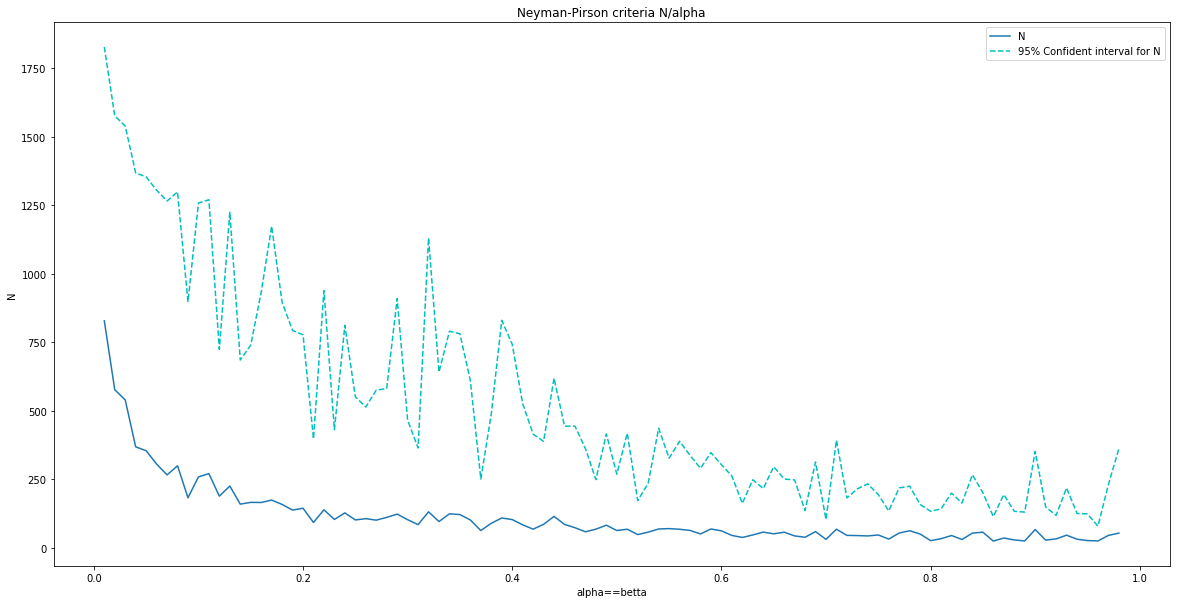

In [321]:
plt.figure(figsize = (20,10))
plt.title('Neyman-Pearson criteria N/alpha')
plt.plot(alpha_list, N_mean, label = "N")
plt.plot(alpha_list, N_mean+np.array(N_std), "c--",label = "95% Confident interval for N")
# plt.plot(alpha_list, [max(0, i) for i in N_mean-np.array(N_std)*3], "c--", 
#          label = "Confident interva;")
plt.legend()
plt.xlabel('alpha==betta')
plt.ylabel('N')
plt.show()


In [294]:
N_NEYMAN_PEARSON = [N_mean, N_std]

# 2
### Sequental probability ratio

In [323]:
# X_1, X_2 = [], []
N_list      = []
N_list_top  = []
N_list_down = []
N_1 = []
for alpha in tqdm(alpha_list):
    betta = alpha
    c0 = betta/(1-alpha)
    c1 = (1-betta)/alpha

    N_1 = []
    for num_of_repeat in range(num_repeat):
        Z1, Z2 = 0,0
        Z_lst_1, Z_lst_2 = [], []
        for n in range(1, 1000):
            X_1 = H1()
            X_2 = H2()

            Z1+=np.log(2) - 1/(2*Q)*X_1
            Z2+=np.log(2) - 1/(2*Q)*X_2
            Z_lst_1.append(Z1)
            Z_lst_2.append(Z2)

            if (Z2<c0) and (Z1>c1):
                #plt.plot(Z_lst_1)
                #plt.plot(Z_lst_2)
                #plt.plot([0,25],[c0,c0])
                #plt.plot([0,25],[c1,c1])
                #plt.show()

                #print(Z1, Z2, c0, c1)
                #print(1/0)
                N_1.append(n)
                break
    N_list.append(np.mean(N_1))
    N_list_top.append(np.percentile(N_1, 95))
    N_list_down.append(np.percentile(N_1, 5))
#     N_list.append(np.mean(N_1))

100%|██████████| 98/98 [00:02<00:00, 34.82it/s]


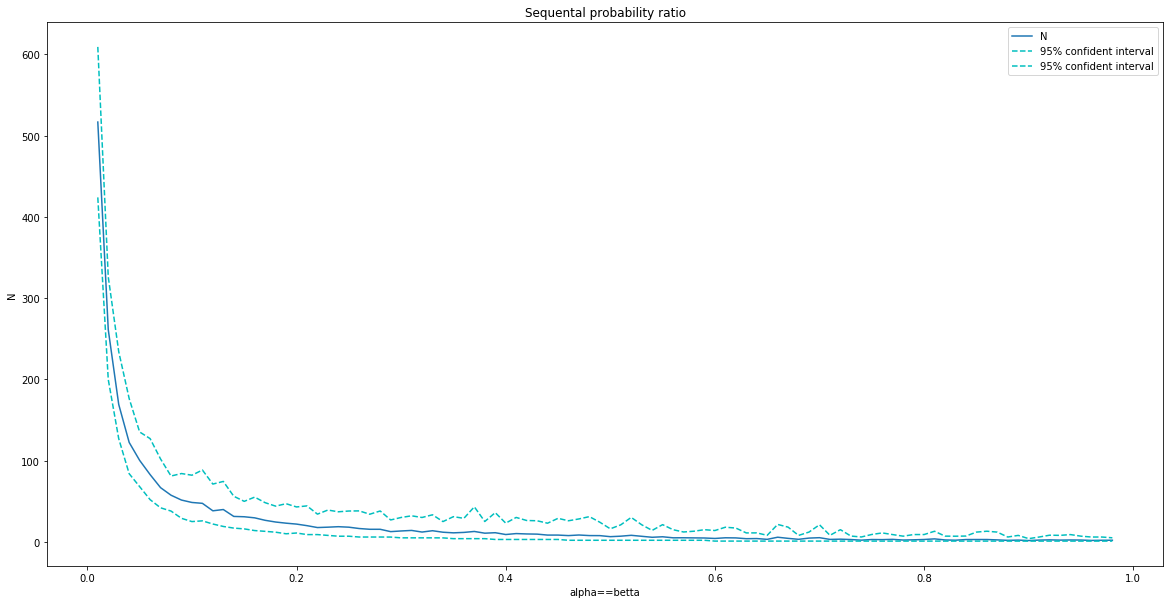

In [324]:
plt.figure(figsize = (20,10))
plt.title('Sequental probability ratio')
plt.plot(alpha_list, N_list, label = "N")
plt.plot(alpha_list, N_list_top,  "c--", label = '95% confident interval')
plt.plot(alpha_list, N_list_down, "c--", label = '95% confident interval')

plt.legend()
plt.xlabel('alpha==betta')
plt.ylabel('N')
plt.show()


# 3
### Both of them

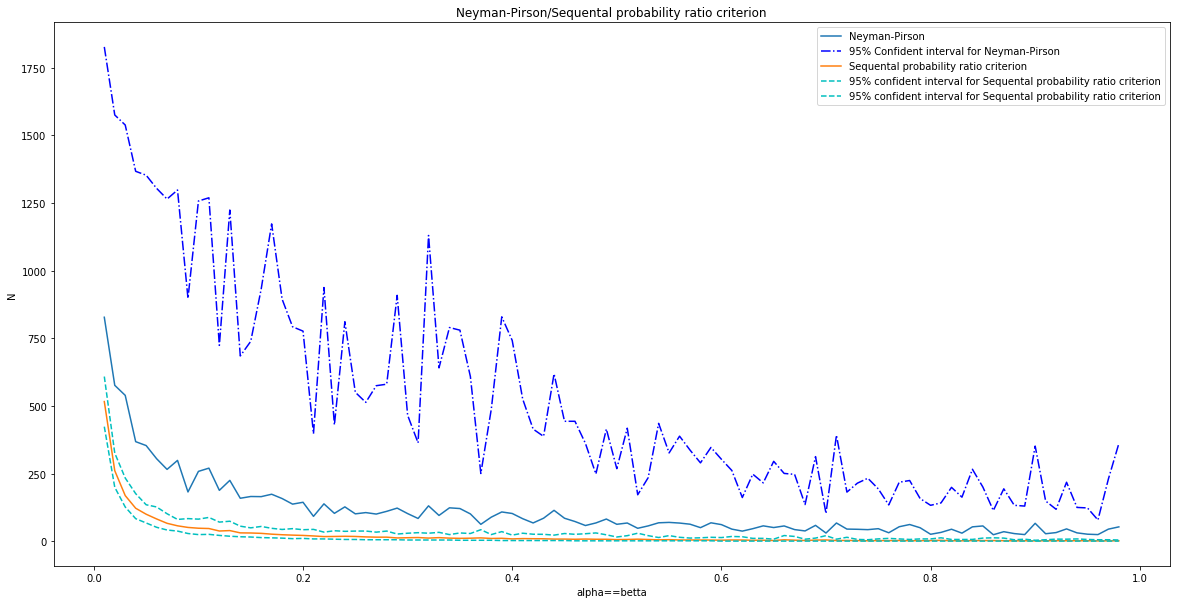

In [328]:
plt.figure(figsize = (20,10))
plt.title('Neyman-Pearson/Sequental probability ratio criterion')
plt.plot(alpha_list, N_mean, label = "Neyman-Pirson")
plt.plot(alpha_list, N_mean+np.array(N_std), "b-.",label = "95% Confident interval for Neyman-Pearson")

plt.plot(alpha_list, N_list, label = "Sequental probability ratio criterion")
plt.plot(alpha_list, N_list_top,  "c--", label = '95% confident interval for Sequental probability ratio criterion')
plt.plot(alpha_list, N_list_down, "c--", label = '95% confident interval for Sequental probability ratio criterion')

plt.legend()
plt.xlabel('alpha==betta')
plt.ylabel('N')
plt.show()


# 4

In [431]:
Q = 20
def H1(gamma):
    return np.random.exponential(Q)

def H2(gamma):
    return np.random.exponential(gamma*Q)

alpha = 0.2
betta = 0.2

c0 = betta/(1-alpha)
c1 = (1-betta)/alpha

num_repeat = 30
#Neyman-pearson
N_mean = []
N_std  = []

#SPR
N_1 = []
N_list, N_list_top, N_list_down = [], [], []
gamma_list = [10**i for i in np.linspace(-3, 3, 20)]
for gamma in tqdm(gamma_list):

    
    n_temp = []
    for ser in range(num_repeat):
        l1, l2 = [], []
        lst1, lst2 = [], []
        gamma_ = gamma
        for i in range(2000):
            lst1.append(H1(gamma_))
            l1.append(1/(0.000001+((gamma_**i)*np.exp(-sum(lst1)/((abs(gamma_-1)/gamma_)*Q)))))
            lst2.append(H2(gamma_))
            l2.append(((gamma_**i)*np.exp(-sum(lst2)/((abs(gamma_-1)/gamma_)*Q))))
            if (np.mean(np.array(l1))<alpha and np.mean(np.array(l2))<betta) or i == N-1:
                n_temp.append(i)
                break
            
    N_mean.append(np.mean(n_temp))
    N_std.append(np.percentile(n_temp, 95))
    
    for num_of_repeat in range(num_repeat):
        Z1, Z2 = 0,0
        Z_lst_1, Z_lst_2 = [], []
        for n in range(1, 2000):
            X_1 = H1(gamma)
            X_2 = H2(gamma)

            Z1+=np.log(gamma) - (1/Q-1/(Q*gamma))*X_1
            Z2+=np.log(gamma) - (1/Q-1/(Q*gamma))*X_2
            Z_lst_1.append(Z1)
            Z_lst_2.append(Z2)

            if (Z2<c0) and (Z1>c1) or (n == N-1):
                N_1.append(n)
                #plt.plot(Z_lst_1)
                #plt.plot(Z_lst_2)
                #plt.show()
                #plt.plot([0,1000],[c0,c0])
                #plt.plot([0,1000],[c1,c1])
                #print(Z_lst_1, Z_lst_2)
                break
                
    N_list.append(np.mean(N_1))
    N_list_top.append(np.percentile(N_1, 95))
    N_list_down.append(np.percentile(N_1, 5))
    N_1 = []

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
100%|██████████| 20/20 [00:15<00:00,  1.97it/s]


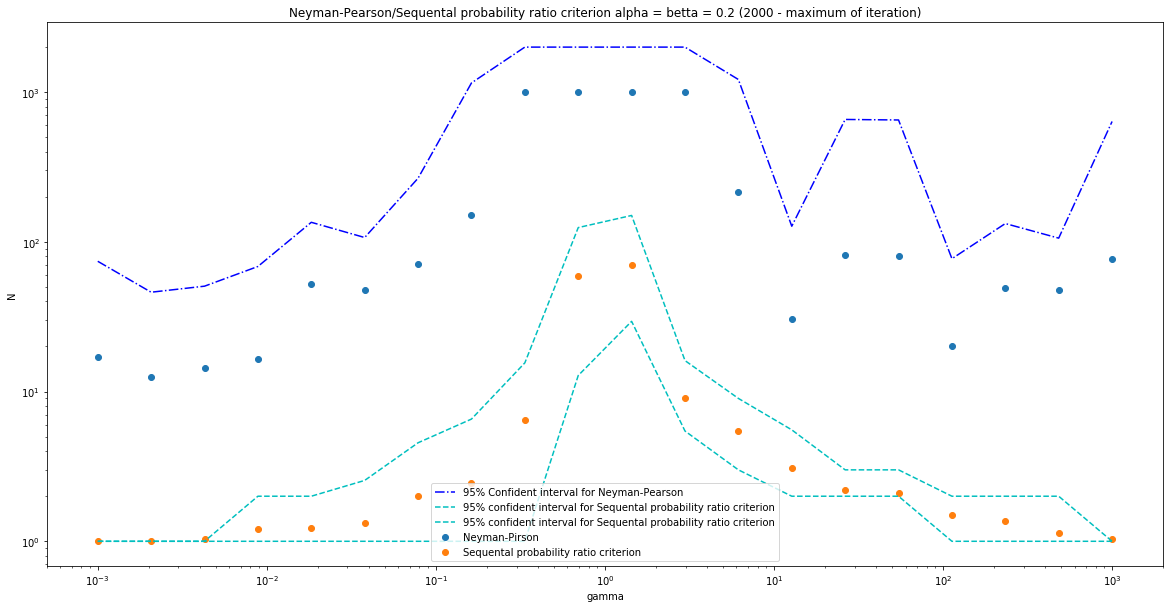

In [432]:
plt.figure(figsize = (20,10))
plt.title('Neyman-Pearson/Sequental probability ratio criterion alpha = betta = 0.2 (2000 - maximum of iteration)')
plt.scatter(gamma_list, N_mean, label = "Neyman-Pirson")
plt.plot(gamma_list, N_mean+np.array(N_std), "b-.",label = "95% Confident interval for Neyman-Pearson")

plt.scatter(gamma_list, N_list, label = "Sequental probability ratio criterion")
plt.plot(gamma_list, N_list_top,  "c--", label = '95% confident interval for Sequental probability ratio criterion')
plt.plot(gamma_list, N_list_down, "c--", label = '95% confident interval for Sequental probability ratio criterion')
# plt.ylim(0,10)
# plt.yscale('log')
plt.legend(loc = 'lower center')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('gamma')
plt.ylabel('N')
plt.show()
